# Instalação das bibliotecas

In [2]:
!pip install pandas
!pip install radon


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas
import radon

# Geração de notas de qualidade dos códigos

In [4]:
submissions_path = './data/submissions.csv'

submissions_df = pandas.read_csv(submissions_path)

submissions_df

,problem_id,submission_id,code
0,4A,269308927,w = int(input())\r\nif w%2 == 0 and w != 2:\r\...
1,4A,268967990,def main():\r\n watermelon = int(input())\r...
2,4A,4278977,n = int(input())\r\nanswer = 'YES' if n > 2 an...
3,4A,204115614,print('YNEOS'[5%~int(input())%2::2])
4,4A,143412806,"# x,y=[int(i)for i in input().split()]\r\n# a,..."
...,...,...,...
145,624A,77988853,"a,b,c,d=map(int,input().split())\r\nprint((b-a..."
146,624A,113002034,"d,l,a,b=map(int,input().split())\r\na=(l-d)/(a..."
147,624A,117302304,"d,L,v1,v2=map(int,input().split())\r\nprint(f'..."
148,624A,232308516,"import math\r\n\r\nd, L, v1, v2 = map(int, inp..."


In [5]:
from radon.metrics import h_visit, mi_visit

def calculate_halstead_effort(source_code):
    """Calculate Halstead effort metric for given source code"""
    return h_visit(source_code).total.effort

def calculate_modularity_score(source_code):
    """Calculate modularity score for given source code"""
    return mi_visit(str(source_code), multi=True)

def calculate_metrics(submission):
    """Calculate code quality metrics for a submission"""
    source_code = submission['code']
    
    return {
        'halstead_effort': calculate_halstead_effort(source_code),
        'modularity_score': calculate_modularity_score(source_code)
    }

def add_metrics_to_dataframe(df):
    """Add calculated metrics as new columns to dataframe"""
    return df.apply(calculate_metrics, axis=1, result_type='expand')

# Calculate and add metrics
submissions_df[['halstead_effort', 'modularity_score']] = add_metrics_to_dataframe(submissions_df)

submissions_df.head()

<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal


,problem_id,submission_id,code,halstead_effort,modularity_score
0,4A,269308927,w = int(input())\r\nif w%2 == 0 and w != 2:\r\...,106.301699,73.141962
1,4A,268967990,def main():\r\n watermelon = int(input())\r...,134.436094,67.644501
2,4A,4278977,n = int(input())\r\nanswer = 'YES' if n > 2 an...,192.051563,77.071070
3,4A,204115614,print('YNEOS'[5%~int(input())%2::2]),22.458839,83.836408
4,4A,143412806,"# x,y=[int(i)for i in input().split()]\r\n# a,...",106.301699,39.837155


Distribuição de scores para modularidade (numa escala de 0 a 100).

In [6]:
!pip install matplotlib
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


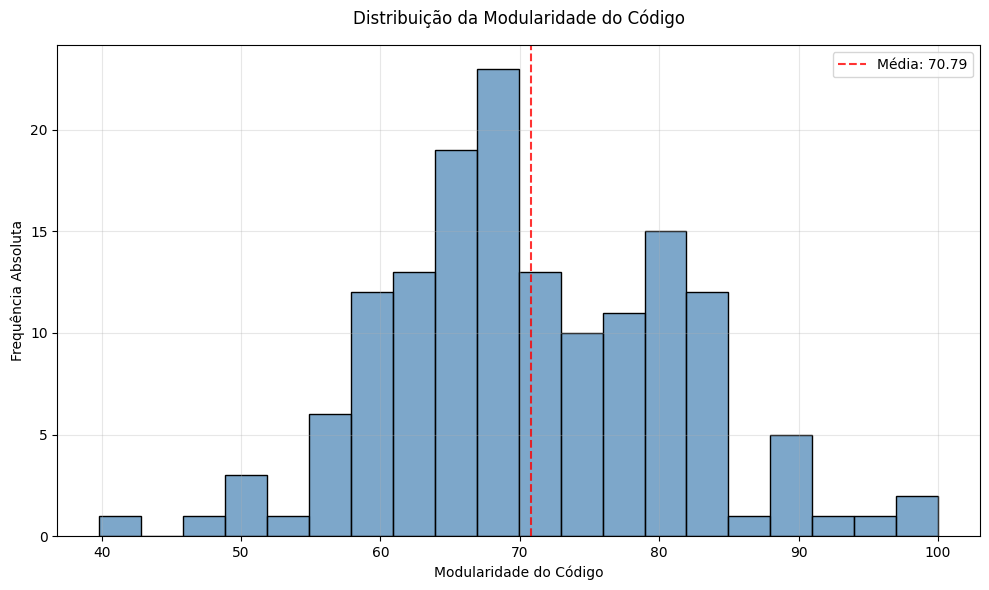

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=submissions_df, x='modularity_score', bins=20, 
             color='steelblue', edgecolor='black', alpha=0.7)

plt.title('Distribuição da Modularidade do Código', fontsize=12, pad=15)
plt.xlabel('Modularidade do Código', fontsize=10)
plt.ylabel('Frequência Absoluta', fontsize=10)

plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

# Add mean line
mean = submissions_df['modularity_score'].mean()
plt.axvline(mean, color='red', linestyle='--', alpha=0.8, 
            label=f'Média: {mean:.2f}')

plt.legend()
plt.tight_layout()

Distribuição de esforço.

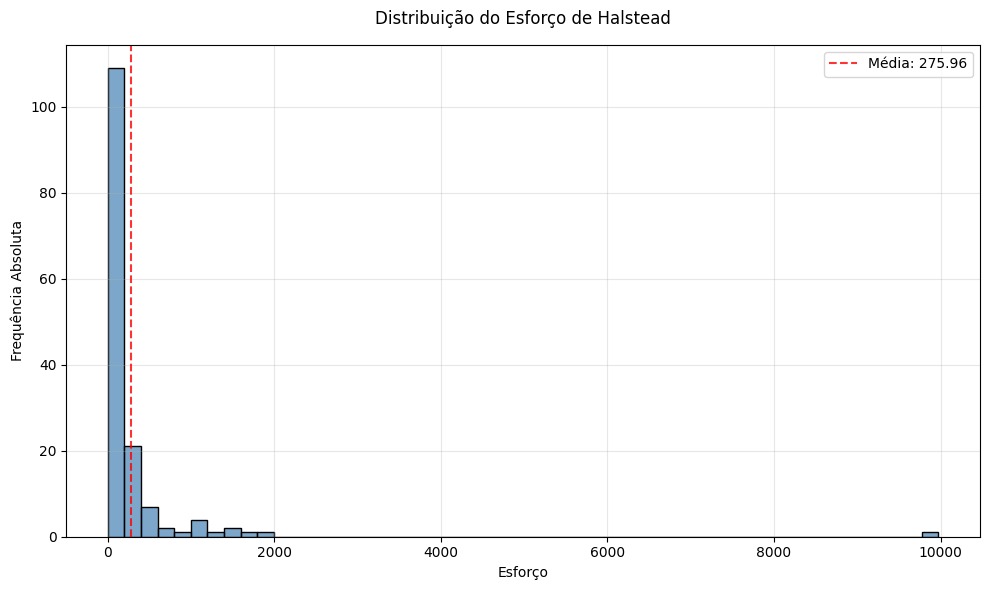

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=submissions_df, x='halstead_effort', bins=50,
             color='steelblue', edgecolor='black', alpha=0.7)

plt.title('Distribuição do Esforço de Halstead', fontsize=12, pad=15)
plt.xlabel('Esforço', fontsize=10)
plt.ylabel('Frequência Absoluta', fontsize=10)

plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

# Add mean line
mean = submissions_df['halstead_effort'].mean()
plt.axvline(mean, color='red', linestyle='--', alpha=0.8,
            label=f'Média: {mean:.2f}')

plt.legend()
plt.tight_layout()

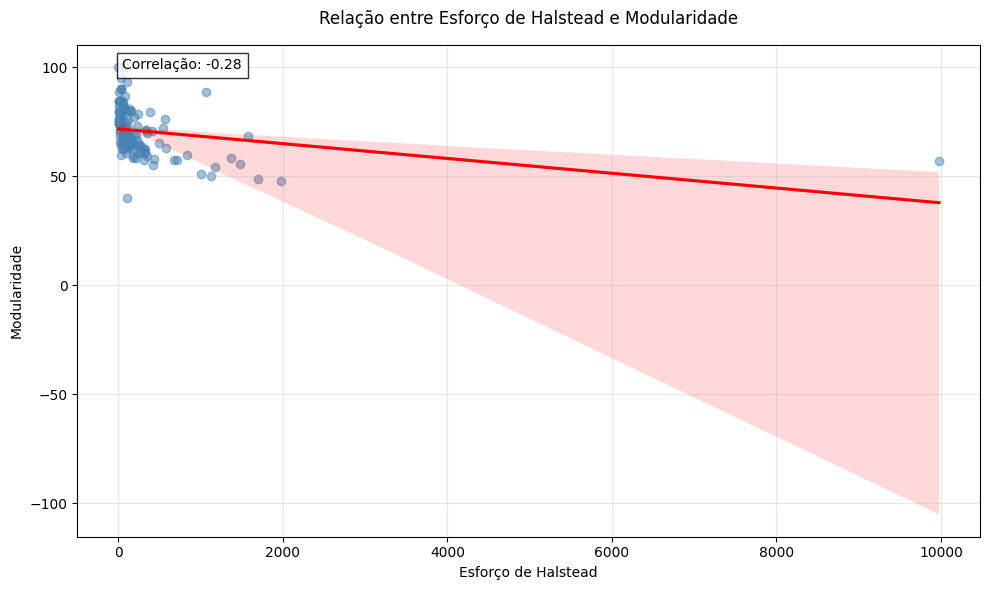

In [9]:
plt.figure(figsize=(10, 6))
sns.regplot(data=submissions_df, x='halstead_effort', y='modularity_score',
            scatter_kws={'alpha':0.5, 'color':'steelblue'},
            line_kws={'color': 'red'})

plt.title('Relação entre Esforço de Halstead e Modularidade', fontsize=12, pad=15)
plt.xlabel('Esforço de Halstead', fontsize=10)
plt.ylabel('Modularidade', fontsize=10)

# Add correlation coefficient annotation
corr = submissions_df['halstead_effort'].corr(submissions_df['modularity_score'])
plt.annotate(f'Correlação: {corr:.2f}', 
            xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()


Text(0.05, 0.95, 'Correlação: -0.47')

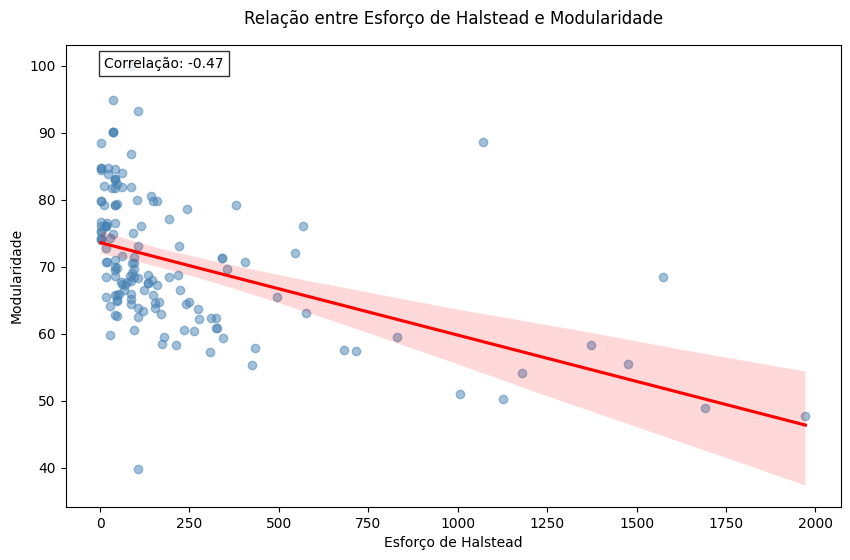

In [10]:
submissions_df = submissions_df[submissions_df['halstead_effort'] < 9000]
submissions_df = submissions_df[submissions_df['halstead_effort'] > 0]
plt.figure(figsize=(10, 6))
sns.regplot(data=submissions_df, x='halstead_effort', y='modularity_score',
            scatter_kws={'alpha':0.5, 'color':'steelblue'},
            line_kws={'color': 'red'})

plt.title('Relação entre Esforço de Halstead e Modularidade', fontsize=12, pad=15)
plt.xlabel('Esforço de Halstead', fontsize=10)
plt.ylabel('Modularidade', fontsize=10)

# Add correlation coefficient annotation
corr = submissions_df['halstead_effort'].corr(submissions_df['modularity_score'])
plt.annotate(f'Correlação: {corr:.2f}', 
            xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=10, bbox=dict(facecolor='white', alpha=0.8))



# Geração de Dados

In [11]:
!pip install openai



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import openai
import pandas as pd
import time

# Configure OpenAI API
openai.api_key = OPENAI_API_KEY

# Load problems and submissions data
problems_df = pd.read_csv('./data/problems.csv')
#submissions_df = pd.read_csv('./data/submissions.csv')

def get_scores(problem_statement, code):
    prompt = """Context: You are a teaching assistant for an Introduction To Programming Course, and your task is to grade the student code submission using the provided rubric. The code is written in Python programming language.
Question: {}
If the code is completely correct give 1 marks. If the code is incorrect give 0
marks. If the code is empty give 0 marks. Do not return the distribution of marks. Just return the final marks. In addition to the functionality score also give a quality score on a scale of 1-5 based on Halstead
metrics and code modularity. Do not correct the previous solution or
solve the question just give the final score as output without any explanation or extra text. Follow all the instructions carefully.
Student Code : {}
The output should be of the format :
Functionality Score :
Overall Quality Score : """.format(problem_statement, code)

    try:
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0,
            max_tokens=1000
        )
        return response.choices[0].message.content
    except Exception as e:
        print(f"Error calling OpenAI API: {e}")
        return None

def parse_scores(score_text):
    try:
        if not score_text:
            return None, None
            
        lines = score_text.strip().split('\n')
        functionality_score = None
        quality_score = None
        
        for line in lines:
            if 'Functionality Score' in line:
                try:
                    functionality_score = int(line.split(':')[1].strip())
                except:
                    pass
            elif 'Quality Score' in line:
                try:
                    quality_score = int(line.split(':')[1].strip())
                except:
                    pass
                    
        if functionality_score is not None and quality_score is not None:
            return functionality_score, quality_score
        return None, None
        
    except Exception as e:
        print(f"Error parsing scores: {e}")
        return None, None

# Process submissions and save scores
scores = []
count = 0
for _, submission in submissions_df.iterrows():
    # Get problem statement from problems_df
    problem_id = submission['problem_id']
    problem = problems_df[problems_df['problem_id'] == problem_id].iloc[0]
    problem_statement = problem['problem_statement']
    
    # Get scores from GPT
    score_text = get_scores(problem_statement, submission['code'])
    functionality_score, quality_score = parse_scores(score_text)
    
    if functionality_score is not None and quality_score is not None:
        scores.append({
            'submission_id': submission['submission_id'],
            'quality_score': quality_score,
            'functionality_score': functionality_score
        })
        
        # Print progress
        count += 1
        print(f"Processed {count} submissions")
        
        # Save and display current scores
        scores_df = pd.DataFrame(scores)
        scores_df.to_csv('grades.csv', index=False)
        print("\nCurrent grades.csv:")
        print(scores_df)
        print("\n" + "="*50 + "\n")
        
    time.sleep(1)  # Rate limiting

# Save final scores to CSV
scores_df = pd.DataFrame(scores)
scores_df.to_csv('grades.csv', index=False)
print("\nFinal grades.csv saved with", len(scores_df), "submissions processed")


Processed 1 submissions

Current grades.csv:
   submission_id  quality_score  functionality_score
0      269308927              3                    1


Processed 2 submissions

Current grades.csv:
   submission_id  quality_score  functionality_score
0      269308927              3                    1
1      268967990              3                    1


Processed 3 submissions

Current grades.csv:
   submission_id  quality_score  functionality_score
0      269308927              3                    1
1      268967990              3                    1
2        4278977              3                    1


Processed 4 submissions

Current grades.csv:
   submission_id  quality_score  functionality_score
0      269308927              3                    1
1      268967990              3                    1
2        4278977              3                    1
3      204115614              2                    1


Processed 5 submissions

Current grades.csv:
   submission_id  quality

# Análise dos resultados

In [40]:
file_path = 'grades.csv'

df = pandas.read_csv(file_path)

df.head()

,submission_id,quality_score,functionality_score
0,269308927,3,1
1,268967990,3,1
2,4278977,3,1
3,204115614,2,1
4,269005075,3,1


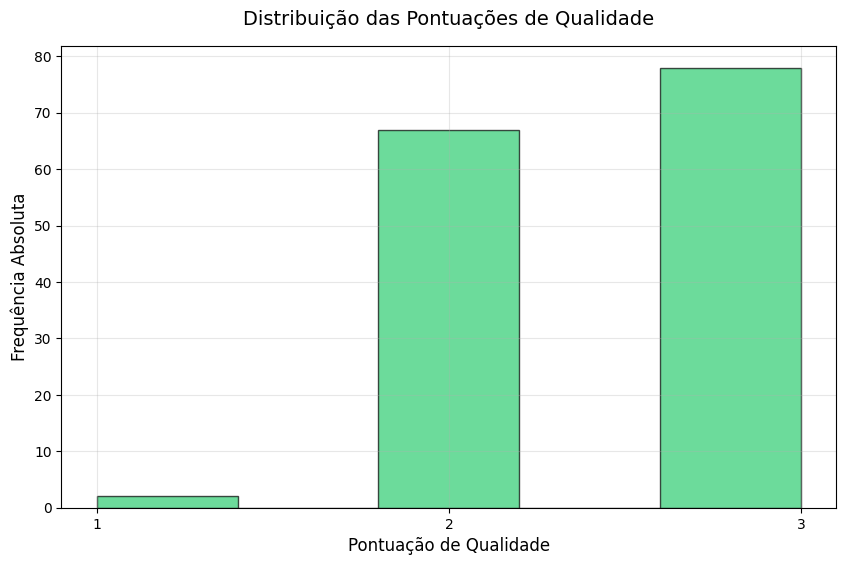

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['quality_score'], bins=5, color='#2ecc71', edgecolor='black', alpha=0.7)
plt.xlabel('Pontuação de Qualidade', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)
plt.title('Distribuição das Pontuações de Qualidade', fontsize=14, pad=15)
plt.grid(True, alpha=0.3)
plt.xticks(range(1,4))
plt.tick_params(labelsize=10)

In [42]:
print(submissions_df.columns)

Index(['problem_id', 'submission_id', 'code', 'halstead_effort',
       'modularity_score'],
      dtype='object')


In [43]:
print(df)

     submission_id  quality_score  functionality_score
0        269308927              3                    1
1        268967990              3                    1
2          4278977              3                    1
3        204115614              2                    1
4        269005075              3                    1
..             ...            ...                  ...
142       77988853              1                    0
143      113002034              2                    1
144      117302304              2                    1
145      232308516              3                    1
146       90502454              2                    1

[147 rows x 3 columns]


In [44]:
merged_df = submissions_df.merge(df, on='submission_id')

# Create verdict list with correct length matching merged_df
n_rows = len(merged_df)
verdicts = []
for i in range(n_rows):
    verdicts.append((9 - (i % 10)) // 5)  # Alternates between 1 and 0 every 5 rows

merged_df['verdict'] = verdicts

merged_df.head()

,problem_id,submission_id,code,halstead_effort,modularity_score,quality_score,functionality_score,verdict
0,4A,269308927,w = int(input())\r\nif w%2 == 0 and w != 2:\r\...,106.301699,73.141962,3,1,1
1,4A,268967990,def main():\r\n watermelon = int(input())\r...,134.436094,67.644501,3,1,1
2,4A,4278977,n = int(input())\r\nanswer = 'YES' if n > 2 an...,192.051563,77.071070,3,1,1
3,4A,204115614,print('YNEOS'[5%~int(input())%2::2]),22.458839,83.836408,2,1,1
4,4A,269005075,w = int(input())\r\nif w % 2 == 0:\r\n prin...,15.509775,76.147052,3,1,1


In [45]:
!pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [46]:
import numpy as np
from scipy.stats import spearmanr

def bootstrap_spearman(x, y, n_bootstrap = 2000, ci = 0.95):
    n = len(x)
    rs = []
    for _ in range(n_bootstrap):
        indices = np.random.choice(n, n, replace = True)
        x_sample = np.array(x)[indices]
        y_sample = np.array(y)[indices]
        r, _ = spearmanr(x_sample, y_sample)
        rs.append(r)
    rs = np.array(rs)
    lower_bound = np.percentile(rs, (1 - ci)/2 * 100)
    upper_bound = np.percentile(rs, (1 + ci)/2 * 100)
    return np.mean(rs), lower_bound, upper_bound

In [47]:
print(bootstrap_spearman(merged_df['modularity_score'], merged_df['quality_score']))

(np.float64(0.0009904796822721874), np.float64(-0.16286255112514073), np.float64(0.17260545284115242))


In [48]:
bootstrap_spearman(merged_df['functionality_score'], merged_df['verdict'])

(np.float64(-0.02595782499363943),
 np.float64(-0.18488197677336532),
 np.float64(0.13224239478758076))

In [49]:
bootstrap_spearman(merged_df['halstead_effort'], merged_df['modularity_score'])

(np.float64(-0.5788985287287489),
 np.float64(-0.6913757335176339),
 np.float64(-0.45373279556774754))

In [50]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [51]:
from sklearn.metrics import accuracy_score

group_by_problem = merged_df.groupby('problem_id')

accuracy_by_problem = group_by_problem.apply(lambda x: accuracy_score(x['verdict'], x['functionality_score']))
accuracy_by_problem

/var/folders/7j/lmtb5czd46xgtdd_grbv1z_h0000gn/T/ipykernel_1656/219526497.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_problem = group_by_problem.apply(lambda x: accuracy_score(x['verdict'], x['functionality_score']))


problem_id
104A    0.500000
146A    0.500000
233A    0.400000
268A    0.500000
32A     0.500000
386A    0.444444
401A    0.500000
448A    0.600000
467A    0.400000
492A    0.300000
4A      0.666667
520A    0.600000
599A    0.500000
59A     0.666667
624A    0.400000
dtype: float64

Geração de matriz de confusão.

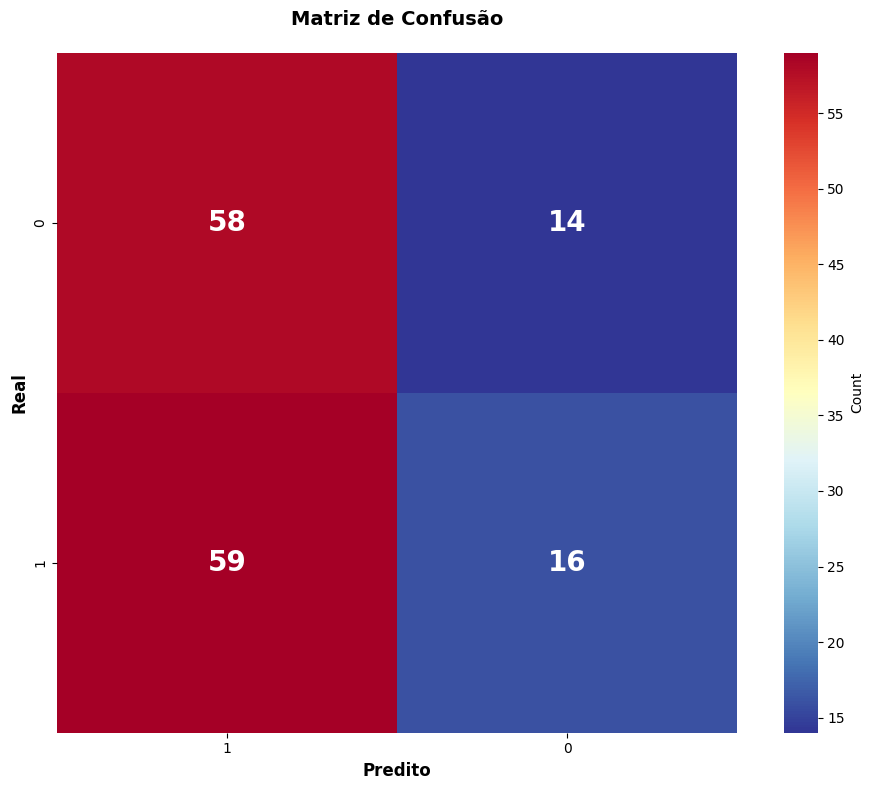

In [59]:
cm = pandas.crosstab(merged_df['verdict'], merged_df['functionality_score'])

plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, 
                 annot=True, 
                 fmt='d',
                 cmap='RdYlBu_r', 
                 annot_kws={'size': 20, 'weight': 'bold'},
                 square=True,
                 cbar_kws={'label': 'Count'})

#ax.invert_yaxis()
ax.invert_xaxis()

ax.set_ylabel('Real', fontsize=12, fontweight='bold')
ax.set_xlabel('Predito', fontsize=12, fontweight='bold')

# Add a title
plt.title('Matriz de Confusão', pad=20, fontsize=14, fontweight='bold')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

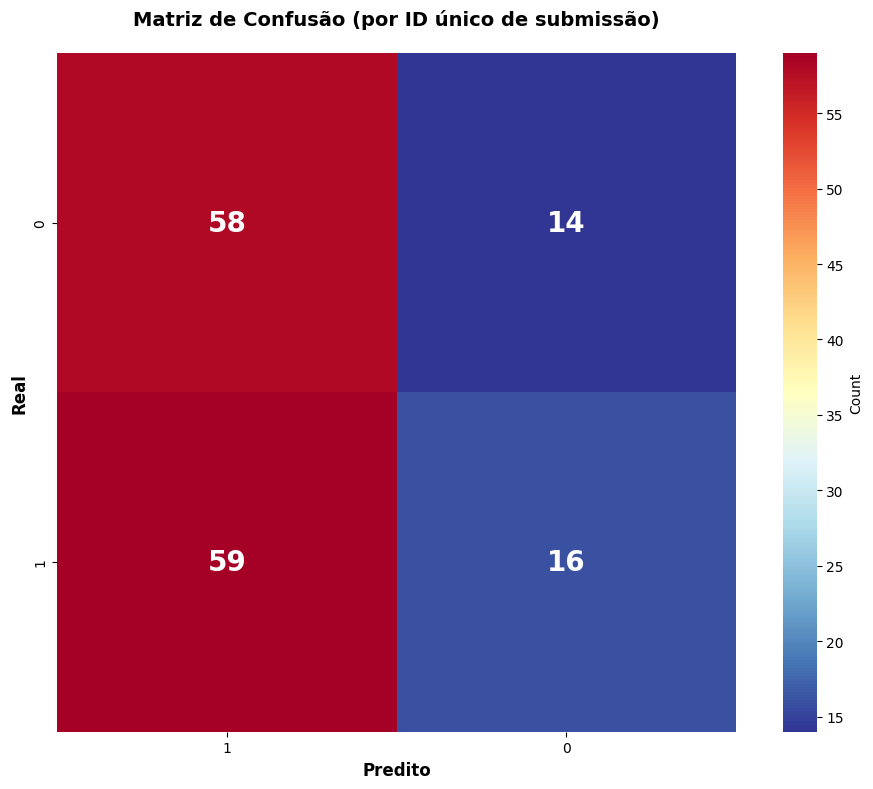

Linhas originais: 147
Linhas após remoção de duplicatas por submission_id: 147
Duplicatas removidas: 0


In [86]:
# Correção: fazendo os cálculos conferindo pelo id da submissão
# Remover duplicatas por submission_id, mantendo apenas a primeira ocorrência
unique_merged_df = merged_df.drop_duplicates(subset=['submission_id'])

# Criar matriz de confusão com dados únicos por submission_id
cm = pandas.crosstab(unique_merged_df['verdict'], unique_merged_df['functionality_score'])

plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, 
                 annot=True, 
                 fmt='d',
                 cmap='RdYlBu_r', 
                 annot_kws={'size': 20, 'weight': 'bold'},
                 square=True,
                 cbar_kws={'label': 'Count'})

#ax.invert_yaxis()
ax.invert_xaxis()

ax.set_ylabel('Real', fontsize=12, fontweight='bold')
ax.set_xlabel('Predito', fontsize=12, fontweight='bold')

# Add a title
plt.title('Matriz de Confusão (por ID único de submissão)', pad=20, fontsize=14, fontweight='bold')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Verificar quantas duplicatas foram removidas
print(f"Linhas originais: {len(merged_df)}")
print(f"Linhas após remoção de duplicatas por submission_id: {len(unique_merged_df)}")
print(f"Duplicatas removidas: {len(merged_df) - len(unique_merged_df)}")

In [81]:
# Calculate overall accuracy
accuracy = accuracy_score(merged_df['verdict'], merged_df['functionality_score'])
print(f"Acurácia geral: {accuracy:.2%}")


Acurácia geral: 49.66%


In [60]:
print(cm)

functionality_score   0   1
verdict                    
0                    14  58
1                    16  59


In [61]:
print(merged_df)

    problem_id  submission_id  \
0           4A      269308927   
1           4A      268967990   
2           4A        4278977   
3           4A      204115614   
4           4A      269005075   
..         ...            ...   
142       624A       77988853   
143       624A      113002034   
144       624A      117302304   
145       624A      232308516   
146       624A       90502454   

                                                  code  halstead_effort  \
0    w = int(input())\r\nif w%2 == 0 and w != 2:\r\...       106.301699   
1    def main():\r\n    watermelon = int(input())\r...       134.436094   
2    n = int(input())\r\nanswer = 'YES' if n > 2 an...       192.051563   
3                 print('YNEOS'[5%~int(input())%2::2])        22.458839   
4    w = int(input())\r\nif w % 2 == 0:\r\n    prin...        15.509775   
..                                                 ...              ...   
142  a,b,c,d=map(int,input().split())\r\nprint((b-a...        42.793988   
143

In [62]:
#salvar merged_df
merged_df.to_csv('merged_df.csv', index=False)


In [63]:
false_positives = merged_df[(merged_df['functionality_score'] == 1) & (merged_df['verdict'] == 0)]
false_negatives = merged_df[(merged_df['functionality_score'] == 0) & (merged_df['verdict'] == 1)]

In [64]:
count_false_positives = len(false_positives)
count_false_negatives = len(false_negatives)
print(count_false_positives)
print(count_false_negatives)

58
16


In [65]:
false_positives

,problem_id,submission_id,code,halstead_effort,modularity_score,quality_score,functionality_score,verdict
5,4A,269170574,def main():\r\n n=int(input())\r\n if n%...,15.509775,76.147052,3,1,0
6,4A,269308016,w = float(input())\r\nif w%2 ==0 : \r\n print...,15.509775,76.147052,3,1,0
8,4A,225507580,n=int(input())\r\nx=n%2\r\ny=n//2\r\nif x==0 a...,193.587975,68.489610,3,1,0
9,32A,73921389,"i=lambda:map(int,input().split())\r\nn,d=i();a...",27.000000,74.326757,3,1,0
15,32A,137964971,"n,d = map(eval,input().split())\r\nlist_1 = li...",134.436094,67.644501,2,1,0
16,32A,107136237,"n,d = map(int,input().split())\r\nlist_=sorted...",89.624063,69.044038,3,1,0
17,32A,58950256,"n,d = map(int,input().split())\r\nl = sorted(l...",223.872469,66.572789,3,1,0
19,59A,85726948,"s=input();print([s.lower(),s.upper()][sum(x<'[...",42.793988,82.974366,3,1,0
26,59A,220509822,s = input()\r\n\r\nupper = set()\r\nlower = se...,27.000000,59.752492,3,1,0
27,59A,220758338,"# import sys \r\n# sys.stdin = open(""/Users/sw...",86.039100,100.000000,3,1,0


In [69]:
import openai
import pandas as pd
import time

# Configure OpenAI API
openai.api_key = OPENAI_API_KEY

# Load problems and submissions data
problems_df = pd.read_csv('./data/problems.csv')
#submissions_df = pd.read_csv('./data/submissions.csv')

def get_scores(problem_statement, code):
    prompt = """Context: You are a teaching assistant for an Introduction To Programming Course, and your task is to grade the student code submission using the provided rubric. The code is written in Python programming language.
Question: {}
If the code is completely correct give 1 marks. If the code is incorrect give 0
marks. If the code is empty give 0 marks. Do not return the distribution of marks. Just return the final marks. In addition to the functionality score also give a quality score on a scale of 1-5 based on Halstead
metrics and code modularity. Do not correct the previous solution or
solve the question just give the final score as output without any explanation or extra text. Follow all the instructions carefully.
Student Code : {}
The output should be of the format :
Functionality Score :
Overall Quality Score : """.format(problem_statement, code)

    try:
        response = openai.chat.completions.create(
            model="o4-mini-2025-04-16",
            messages=[{"role": "user", "content": prompt}]
        )
        return response.choices[0].message.content
    except Exception as e:
        print(f"Error calling OpenAI API: {e}")
        return None

def parse_scores(score_text):
    try:
        if not score_text:
            return None, None
            
        lines = score_text.strip().split('\n')
        functionality_score = None
        quality_score = None
        
        for line in lines:
            if 'Functionality Score' in line:
                try:
                    functionality_score = int(line.split(':')[1].strip())
                except:
                    pass
            elif 'Quality Score' in line:
                try:
                    quality_score = int(line.split(':')[1].strip())
                except:
                    pass
                    
        if functionality_score is not None and quality_score is not None:
            return functionality_score, quality_score
        return None, None
        
    except Exception as e:
        print(f"Error parsing scores: {e}")
        return None, None

# Process submissions and save scores
scores = []
count = 0
for _, submission in submissions_df.iterrows():
    # Get problem statement from problems_df
    problem_id = submission['problem_id']
    problem = problems_df[problems_df['problem_id'] == problem_id].iloc[0]
    problem_statement = problem['problem_statement']
    
    # Get scores from GPT
    score_text = get_scores(problem_statement, submission['code'])
    functionality_score, quality_score = parse_scores(score_text)
    
    if functionality_score is not None and quality_score is not None:
        scores.append({
            'submission_id': submission['submission_id'],
            'quality_score': quality_score,
            'functionality_score': functionality_score
        })
        
        # Print progress
        count += 1
        print(f"Processed {count} submissions")
        
        # Save and display current scores
        scores_df = pd.DataFrame(scores)
        scores_df.to_csv('gpto4_grades.csv', index=False)
        print("\nCurrent gpto4_grades.csv:")
        print(scores_df)
        print("\n" + "="*50 + "\n")
        
    time.sleep(1)  # Rate limiting

# Save final scores to CSV
scores_df = pd.DataFrame(scores)
scores_df.to_csv('gpto4_grades.csv', index=False)
print("\nFinal gpto4_grades.csv saved with", len(scores_df), "submissions processed")


Processed 1 submissions

Current gpto4_grades.csv:
   submission_id  quality_score  functionality_score
0      269308927              4                    1


Processed 2 submissions

Current gpto4_grades.csv:
   submission_id  quality_score  functionality_score
0      269308927              4                    1
1      268967990              5                    1


Processed 3 submissions

Current gpto4_grades.csv:
   submission_id  quality_score  functionality_score
0      269308927              4                    1
1      268967990              5                    1
2        4278977              4                    1


Processed 4 submissions

Current gpto4_grades.csv:
   submission_id  quality_score  functionality_score
0      269308927              4                    1
1      268967990              5                    1
2        4278977              4                    1
3      204115614              1                    1


Processed 5 submissions

Current gpto4_grades.

In [71]:
# Import required libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


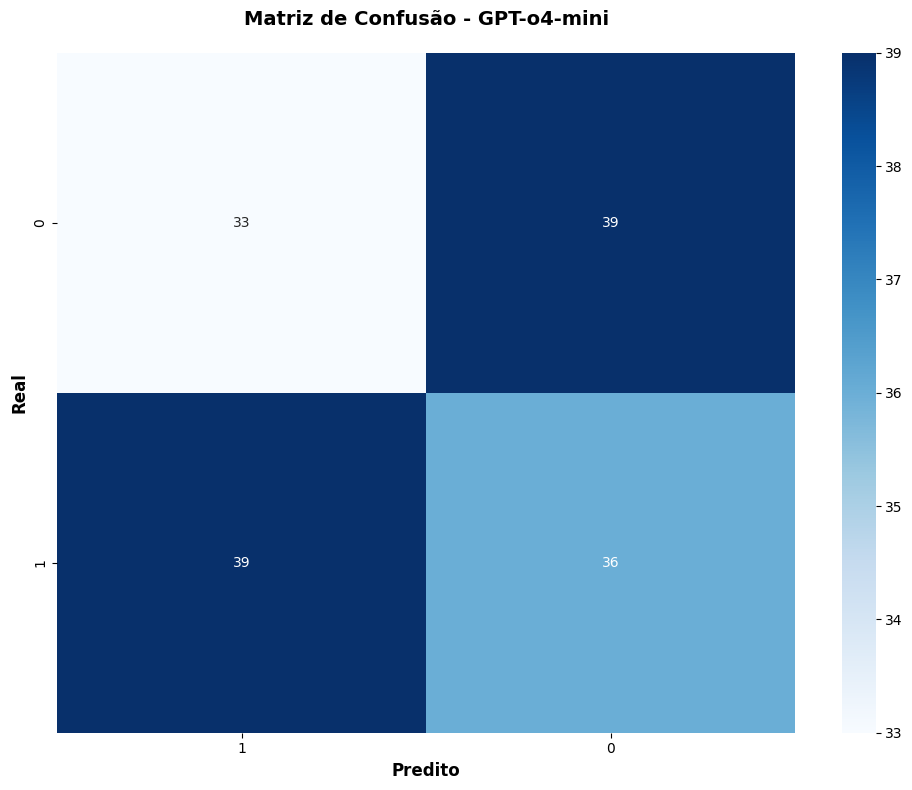

GPT-4 False Positives: 33
GPT-4 False Negatives: 36

Falsos Positivos GPT-4:
    problem_id  submission_id  \
9          32A       73921389   
19         59A       85726948   
28        104A      112404248   
29        104A      189849393   
38        146A       39669757   
39        146A       38123484   
48        233A      234429687   
49        233A      169473686   
58        268A      131670468   
59        268A      102749520   
68        386A       14825864   
69        386A      158767022   
75        386A      262282481   
77        401A      117131173   
79        401A       86089020   
87        448A       89771800   
88        448A       21342587   
89        448A      112326675   
97        467A      218245929   
98        467A       43994453   
99        467A       94500640   
107       492A      166443798   
108       492A      111410634   
109       492A      145067225   
117       520A      165698486   
118       520A      267611391   
119       520A      182425118   

In [82]:
# Carregar os dados do GPT-4
gpto4_df = pd.read_csv('gpto4_grades.csv')

# Criar um dicionário para mapear submission_id -> functionality_score do GPT-4
gpto4_scores = dict(zip(gpto4_df['submission_id'], gpto4_df['functionality_score']))

# Criar um dicionário para mapear submission_id -> verdict do merged_df 
merged_scores = dict(zip(merged_df['submission_id'], merged_df['verdict']))

# Obter os ids em comum
common_ids = set(gpto4_scores.keys()) & set(merged_scores.keys())

# Criar listas alinhadas de predições e valores reais
y_true = []
y_pred = []
for submission_id in common_ids:
    y_true.append(merged_scores[submission_id])
    y_pred.append(gpto4_scores[submission_id])

# Criar matriz de confusão para GPT-4
cm_gpto4 = confusion_matrix(y_true, y_pred)

# Criar visualização da matriz de confusão
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Plot heatmap
sns.heatmap(cm_gpto4, annot=True, fmt='d', cmap='Blues', ax=ax)

# Customize labels
ax.set_ylabel('Real', fontsize=12, fontweight='bold')
ax.set_xlabel('Predito', fontsize=12, fontweight='bold')

# Add title
plt.title('Matriz de Confusão - GPT-o4-mini', pad=20, fontsize=14, fontweight='bold')

# Inverter eixo x
ax.invert_xaxis()

# Adjust layout
plt.tight_layout()
plt.show()

# Calcular falsos positivos e negativos para GPT-4
false_positives = []
false_negatives = []

for submission_id in common_ids:
    pred = gpto4_scores[submission_id]
    true = merged_scores[submission_id]
    
    if pred == 1 and true == 0:
        false_positives.append(submission_id)
    elif pred == 0 and true == 1:
        false_negatives.append(submission_id)

print("GPT-4 False Positives:", len(false_positives))
print("GPT-4 False Negatives:", len(false_negatives))

# Mostrar casos de falsos positivos do GPT-4
print("\nFalsos Positivos GPT-4:")
print(merged_df[merged_df['submission_id'].isin(false_positives)])


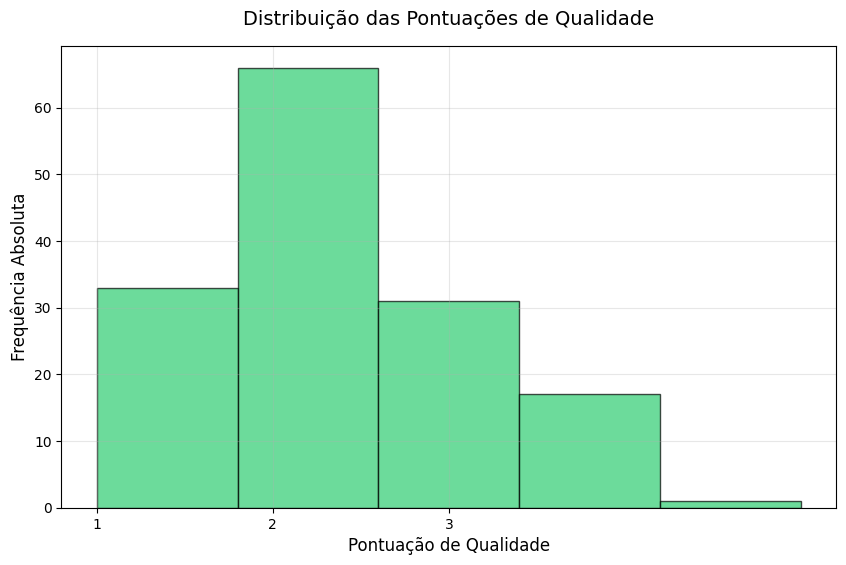

In [93]:
plt.figure(figsize=(10, 6))
plt.hist(gpto4_df['quality_score'], bins=5, color='#2ecc71', edgecolor='black', alpha=0.7)
plt.xlabel('Pontuação de Qualidade', fontsize=12)
plt.ylabel('Frequência Absoluta', fontsize=12)
plt.title('Distribuição das Pontuações de Qualidade', fontsize=14, pad=15)
plt.grid(True, alpha=0.3)
plt.xticks(range(1,4))
plt.tick_params(labelsize=10)

In [84]:
# Correlação entre modularidade e qualidade
print("Correlação entre modularidade e qualidade:")
print(bootstrap_spearman(merged_df['modularity_score'], merged_df['quality_score']))

# Correlação entre funcionalidade e veredito
print("\nCorrelação entre funcionalidade e veredito:")
print(bootstrap_spearman(merged_df['functionality_score'], merged_df['verdict']))

# Correlação entre esforço de Halstead e modularidade
print("\nCorrelação entre esforço de Halstead e modularidade:")
print(bootstrap_spearman(merged_df['halstead_effort'], merged_df['modularity_score']))

Correlação entre modularidade e qualidade:
(np.float64(0.00035907725801830216), np.float64(-0.16680815444613123), np.float64(0.16502770463367256))

Correlação entre funcionalidade e veredito:
(np.float64(-0.022407716510627354), np.float64(-0.18561668901591913), np.float64(0.139956176483861))

Correlação entre esforço de Halstead e modularidade:
(np.float64(-0.5803381889475455), np.float64(-0.6956960112663888), np.float64(-0.4512755821510436))


In [89]:
# Calcular acurácia geral do GPT-o4-mini

accuracy_gpto4_mini = accuracy_score(merged_subset['verdict'],  gpto4_subset['functionality_score'])
print(f"Acurácia geral: {accuracy_gpto4_mini :.2%}")


Acurácia geral: 53.06%


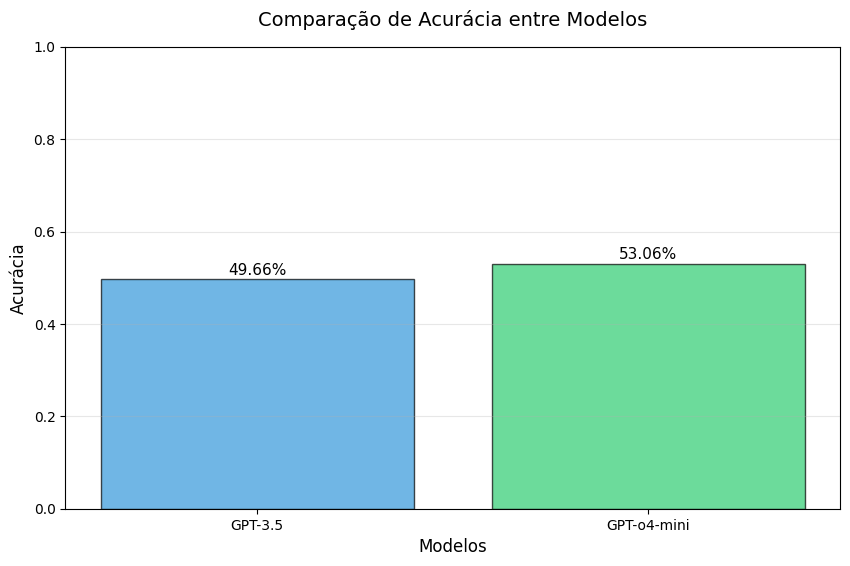

In [91]:
# Criar um gráfico de barras comparando as acurácias dos modelos
plt.figure(figsize=(10, 6))

modelos = ['GPT-3.5', 'GPT-o4-mini']
acuracias = [accuracy, accuracy_gpto4_mini]

plt.bar(modelos, acuracias, color=['#3498db', '#2ecc71'], alpha=0.7, edgecolor='black')
plt.ylim(0, 1)

plt.title('Comparação de Acurácia entre Modelos', fontsize=14, pad=15)
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)

# Adicionar valores em cima das barras
for i, v in enumerate(acuracias):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center', fontsize=11)

plt.grid(True, alpha=0.3, axis='y')
plt.tick_params(labelsize=10)

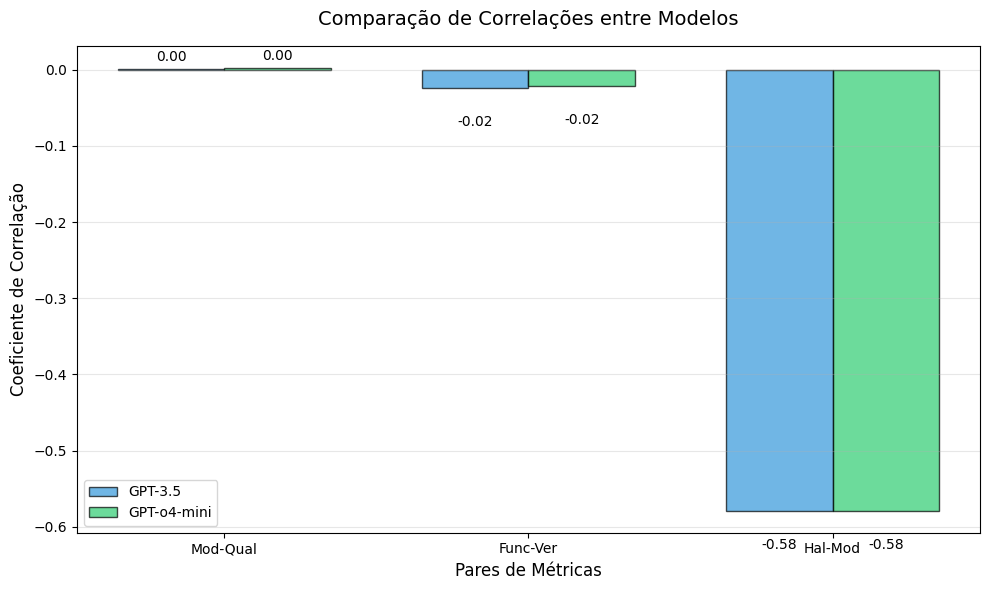

In [92]:
# Criar um gráfico de barras para comparar as correlações entre os modelos
plt.figure(figsize=(10, 6))

# Correlações para GPT-3.5
correlacoes_gpt35 = [
    ('Mod-Qual', bootstrap_spearman(merged_df['modularity_score'], merged_df['quality_score'])[0]),
    ('Func-Ver', bootstrap_spearman(merged_df['functionality_score'], merged_df['verdict'])[0]), 
    ('Hal-Mod', bootstrap_spearman(merged_df['halstead_effort'], merged_df['modularity_score'])[0])
]

# Correlações para GPT-o4-mini
correlacoes_gpto4 = [
    ('Mod-Qual', bootstrap_spearman(merged_subset['modularity_score'], merged_subset['quality_score'])[0]),
    ('Func-Ver', bootstrap_spearman(merged_subset['functionality_score'], merged_subset['verdict'])[0]),
    ('Hal-Mod', bootstrap_spearman(merged_subset['halstead_effort'], merged_subset['modularity_score'])[0])
]

nomes = [c[0] for c in correlacoes_gpt35]
valores_gpt35 = [c[1] for c in correlacoes_gpt35]
valores_gpto4 = [c[1] for c in correlacoes_gpto4]

x = np.arange(len(nomes))
width = 0.35

plt.bar(x - width/2, valores_gpt35, width, label='GPT-3.5', color='#3498db', alpha=0.7, edgecolor='black')
plt.bar(x + width/2, valores_gpto4, width, label='GPT-o4-mini', color='#2ecc71', alpha=0.7, edgecolor='black')

plt.title('Comparação de Correlações entre Modelos', fontsize=14, pad=15)
plt.xlabel('Pares de Métricas', fontsize=12)
plt.ylabel('Coeficiente de Correlação', fontsize=12)

# Adicionar valores nas barras
for i, v in enumerate(valores_gpt35):
    plt.text(i - width/2, v + 0.01 if v >= 0 else v - 0.05, f'{v:.2f}', ha='center', fontsize=10)
for i, v in enumerate(valores_gpto4):
    plt.text(i + width/2, v + 0.01 if v >= 0 else v - 0.05, f'{v:.2f}', ha='center', fontsize=10)

plt.grid(True, alpha=0.3, axis='y')
plt.tick_params(labelsize=10)
plt.xticks(x, nomes)

plt.legend()
plt.tight_layout()

